In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Daylight

In [4]:
data = pd.read_csv('../DATA/data.csv')
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

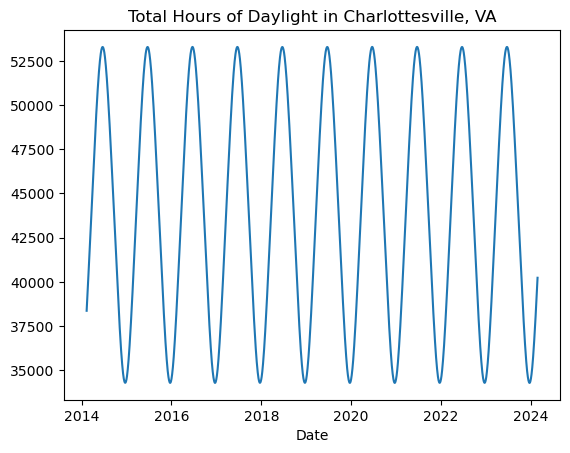

In [7]:
# Daylight Time Series
plt.plot(data['daylight'])
plt.title('Total Hours of Daylight in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

In [8]:
# ADF Fuller test: checking for stationarity
adf_test = adfuller(data['daylight'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -15.815469
p-value: 0.000000


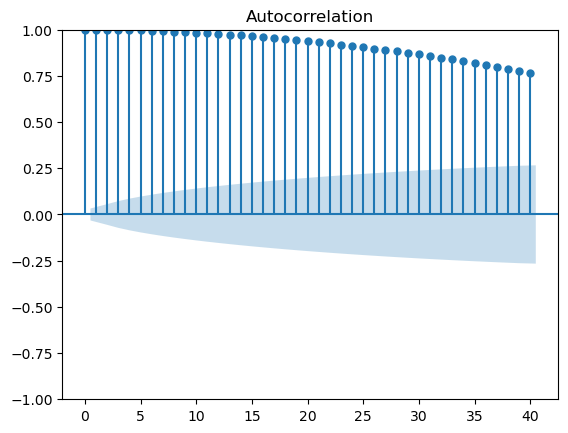

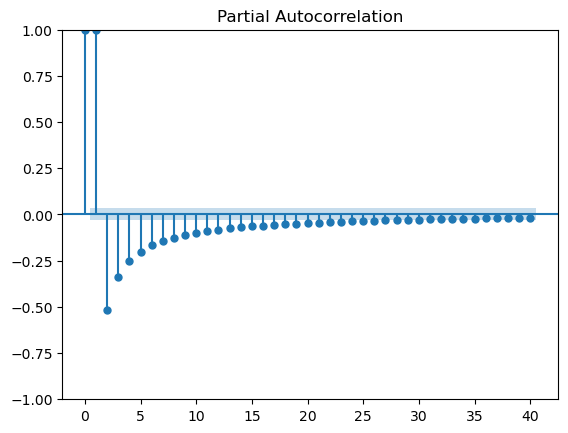

In [9]:
# Stationarity found: no need to difference it
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['daylight'], lags=40)
plot_pacf(data['daylight'], lags=40)
plt.show()

# Determining p, q, and d
ACF model decays gradually: indicates p,d,0 model


In [19]:
# Building the ARIMA
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['daylight'], order=(1, 1, 0))
model_fit = model.fit()

c:\Users\julmu\miniconda3\envs\machinelearning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\julmu\miniconda3\envs\machinelearning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\julmu\miniconda3\envs\machinelearning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [20]:
# Training and Forecasting
forecast = model_fit.get_forecast(steps=30)

c:\Users\julmu\miniconda3\envs\machinelearning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\julmu\miniconda3\envs\machinelearning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\julmu\miniconda3\envs\machinelearning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\julmu\miniconda3\envs\machinelearning\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\julmu\miniconda3\envs\machinelearning\Lib\site-package

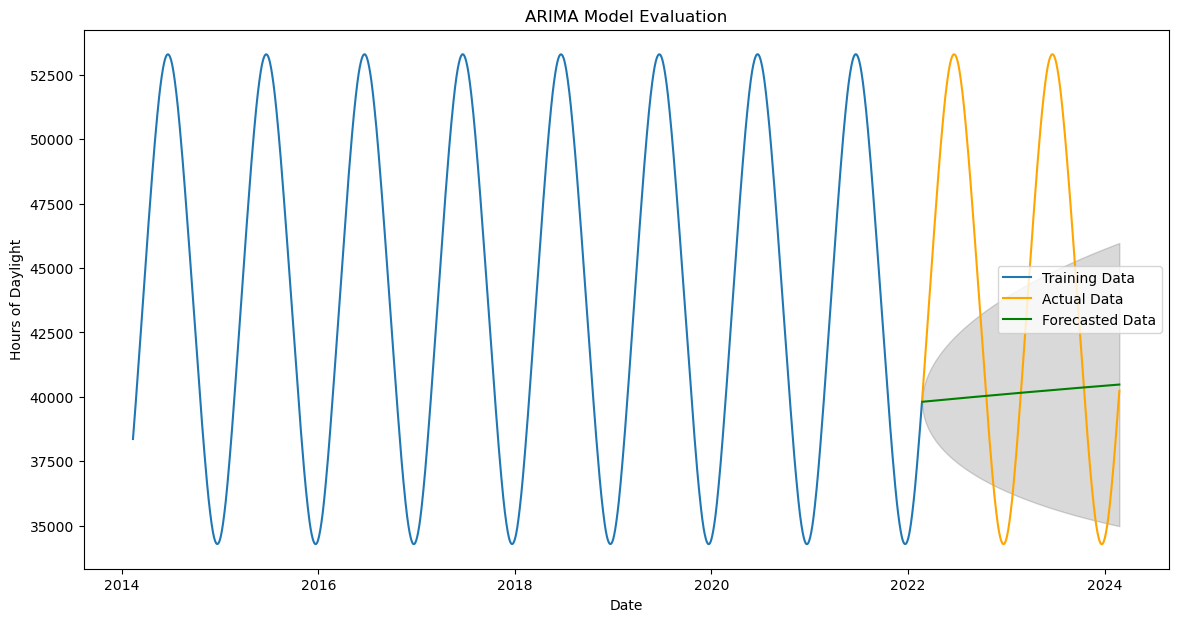

RMSE: 7575.0228044292235


In [22]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['daylight'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['daylight'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['daylight'], label='Training Data')
plt.plot(test['daylight'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Hours of Daylight')
plt.legend()
plt.show()

print('RMSE:', rmse)

# Sunshine

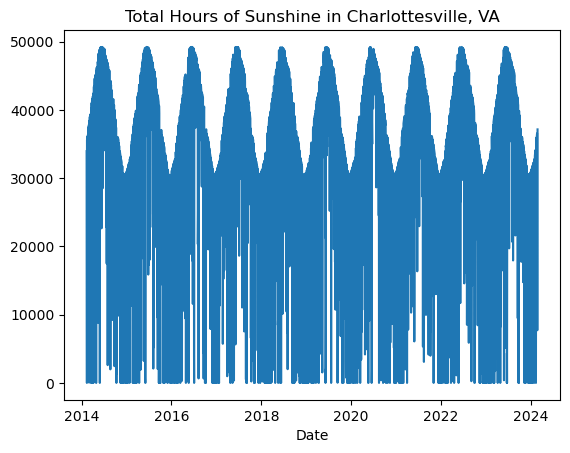

In [10]:
# Daylight Time Series
plt.plot(data['sunshine'])
plt.title('Total Hours of Sunshine in Charlottesville, VA')
plt.xlabel('Date')
plt.ylabel('')
plt.show()

In [11]:
# ADF Fuller test: checking for stationarity
adf_test = adfuller(data['sunshine'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.926624
p-value: 0.000031


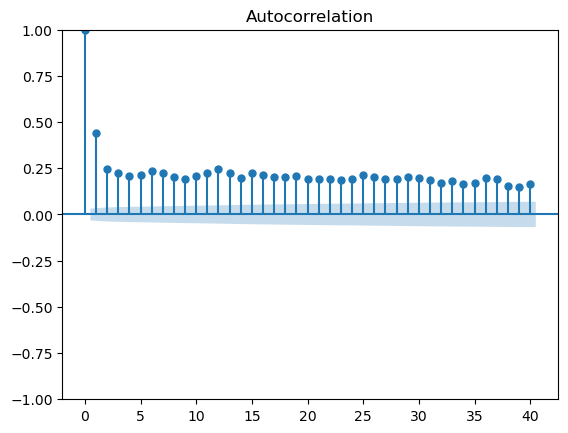

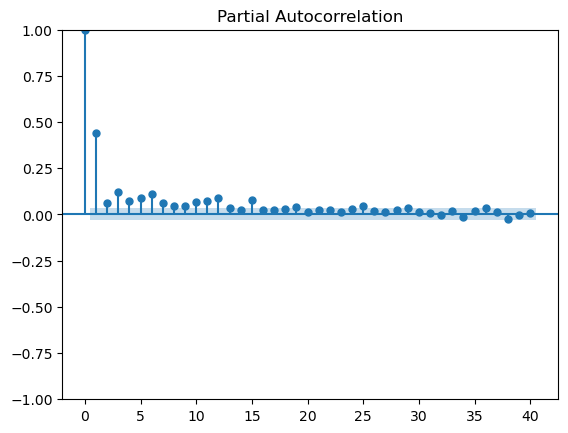

In [12]:
# Stationarity found: no need to difference it
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['sunshine'], lags=40)
plot_pacf(data['sunshine'], lags=40)
plt.show()

# Determining p, q, and d
ACF model decays gradually: indicates p,d,0 model
Lag 2 is closest to the dense part of the PACF graph, so our p is lag 1 (by doing n-1).
Order: (1,1,0)


In [15]:
# Building the ARIMA
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data['sunshine'], order=(1, 1, 0))
model_fit = model.fit()

c:\Users\julmu\miniconda3\envs\machinelearning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\julmu\miniconda3\envs\machinelearning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\julmu\miniconda3\envs\machinelearning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [16]:
# Training and Forecasting
forecast = model_fit.get_forecast(steps=30)

c:\Users\julmu\miniconda3\envs\machinelearning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\julmu\miniconda3\envs\machinelearning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\julmu\miniconda3\envs\machinelearning\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\julmu\miniconda3\envs\machinelearning\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\julmu\miniconda3\envs\machinelearning\Lib\site-packages

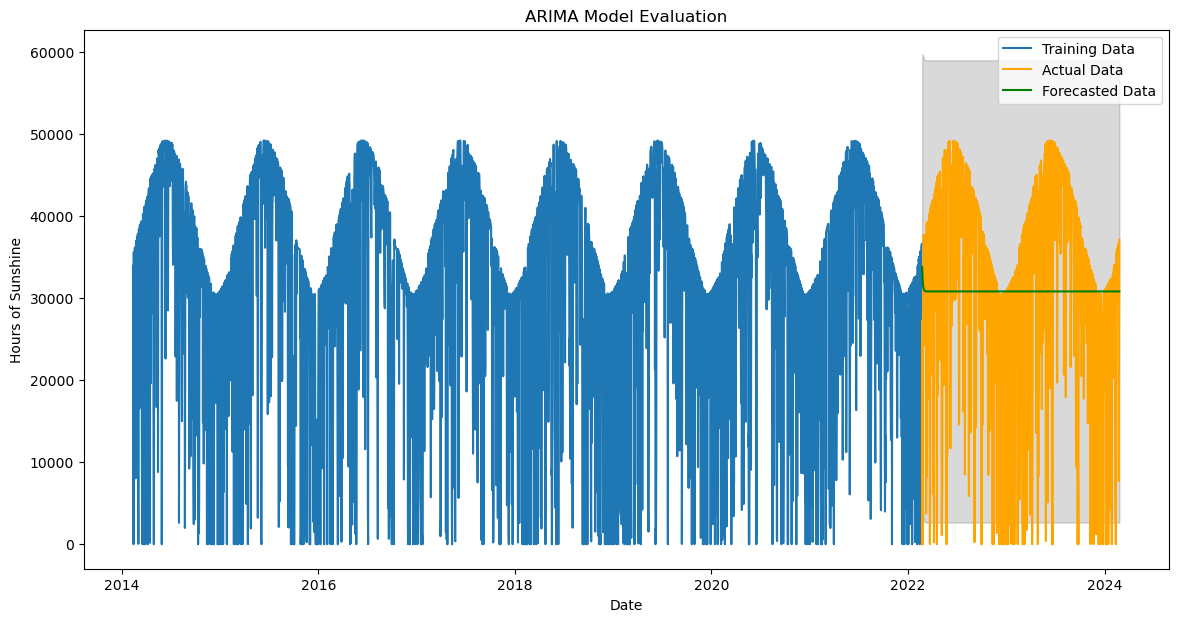

RMSE: 13490.367521636583


In [18]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(data) * 0.8)
train, test = data[0:train_size], data[train_size:len(data)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['sunshine'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['sunshine'], test_forecast_series)
rmse = mse**0.5

# Create a plot to compare the forecast with the actual test data
plt.figure(figsize=(14,7))
plt.plot(train['sunshine'], label='Training Data')
plt.plot(test['sunshine'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Hours of Sunshine')
plt.legend()
plt.show()

print('RMSE:', rmse)